In [119]:
# Import necessary libraries

import pandas as pd
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns




# Load the dataset from kaggle 


In [120]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Data Visualization


### Show training & testing dataset columns

In [121]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Show the training dataset

In [122]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Show the dataset types pf training dataset

In [123]:
train_df.dtypes[train_df.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

## Scatter plots to check relationships and identify outliers

### Draw plot to discover outliers of building classes

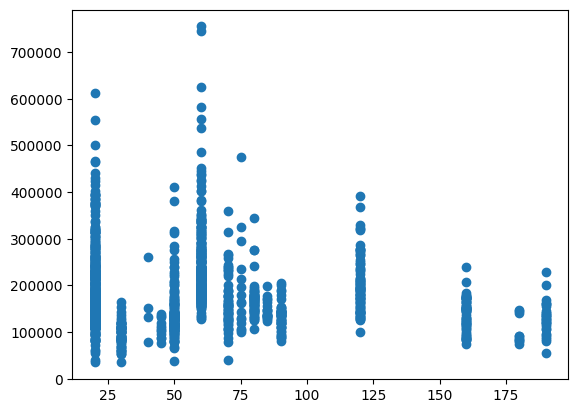

In [124]:
plt.scatter(x='MSSubClass', y='SalePrice', data=train_df)

### Draw plot to discover outliers and noise

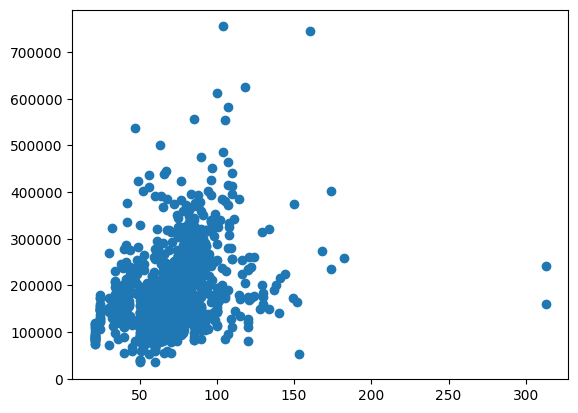

In [125]:
plt.scatter(x='LotFrontage', y='SalePrice', data=train_df)


### Identify outliers in LotFrontage

In [126]:
train_df.query('LotFrontage > 300')

# Drop identified outliers based on LotFrontage
# Drop rows 935 and 1299 based on LotFrontage outlier analysis

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


### Draw plot to discover outliers and noise

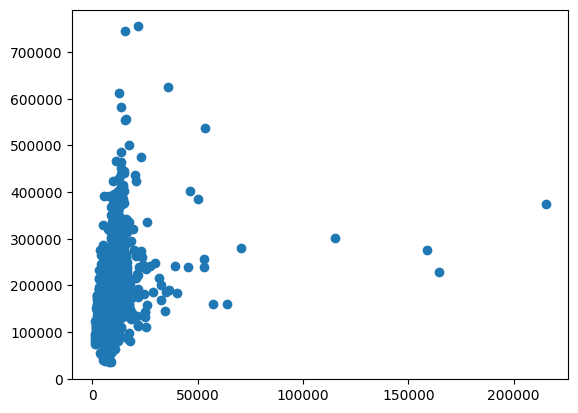

In [127]:
plt.scatter(x='LotArea', y='SalePrice', data=train_df)


In [128]:
train_df.query('LotArea > 55000')
#outliers 250, 314, 336, 707


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


###  Z-score analysis to identify outliers in LotArea

In [129]:
stats.zscore(train_df['LotArea']).sort_values().tail(10)


384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

### Scatter plot to observe relationship between OverallQual and SalePrice


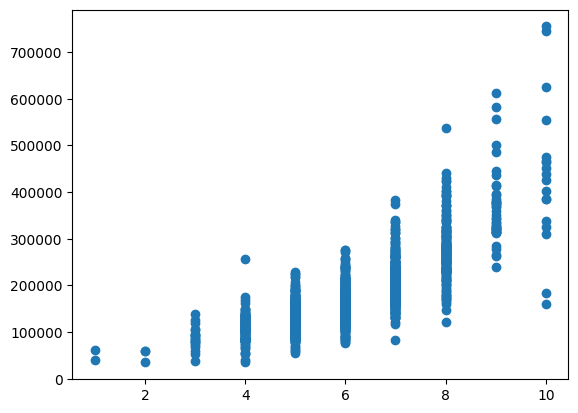

In [130]:
plt.scatter(x='OverallQual', y='SalePrice', data=train_df)


###   Understanding Data

In [131]:
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# **Cleaning Data**


In [132]:
train_df.isnull() #true means missing values

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


## Missing Data Percentage

In [133]:
missing_data = [(i, np.round(train_df[i].isnull().mean() * 100, 2)) for i in train_df]

missing_data_sorted = sorted(missing_data, key=lambda x: x[1], reverse=True)

for i, value in missing_data_sorted:
    print(f"{i}: {value}%")

train_df.shape, test_df.shape

PoolQC: 99.52%
MiscFeature: 96.3%
Alley: 93.77%
Fence: 80.75%
MasVnrType: 59.73%
FireplaceQu: 47.26%
LotFrontage: 17.74%
GarageType: 5.55%
GarageYrBlt: 5.55%
GarageFinish: 5.55%
GarageQual: 5.55%
GarageCond: 5.55%
BsmtExposure: 2.6%
BsmtFinType2: 2.6%
BsmtQual: 2.53%
BsmtCond: 2.53%
BsmtFinType1: 2.53%
MasVnrArea: 0.55%
Electrical: 0.07%
Id: 0.0%
MSSubClass: 0.0%
MSZoning: 0.0%
LotArea: 0.0%
Street: 0.0%
LotShape: 0.0%
LandContour: 0.0%
Utilities: 0.0%
LotConfig: 0.0%
LandSlope: 0.0%
Neighborhood: 0.0%
Condition1: 0.0%
Condition2: 0.0%
BldgType: 0.0%
HouseStyle: 0.0%
OverallQual: 0.0%
OverallCond: 0.0%
YearBuilt: 0.0%
YearRemodAdd: 0.0%
RoofStyle: 0.0%
RoofMatl: 0.0%
Exterior1st: 0.0%
Exterior2nd: 0.0%
ExterQual: 0.0%
ExterCond: 0.0%
Foundation: 0.0%
BsmtFinSF1: 0.0%
BsmtFinSF2: 0.0%
BsmtUnfSF: 0.0%
TotalBsmtSF: 0.0%
Heating: 0.0%
HeatingQC: 0.0%
CentralAir: 0.0%
1stFlrSF: 0.0%
2ndFlrSF: 0.0%
LowQualFinSF: 0.0%
GrLivArea: 0.0%
BsmtFullBath: 0.0%
BsmtHalfBath: 0.0%
FullBath: 0.0%
HalfBa

((1460, 81), (1459, 80))

## Removing Features with High Missing Data

In [134]:
train_df.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage'], axis = 1, inplace=True)
test_df.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage'], axis = 1,inplace=True)

train_df.shape, test_df.shape

((1460, 74), (1459, 73))

## Splitting Data into Features and Target for Model Training 


In [135]:
print('SalePrice' in test_df.columns)
features_train = train_df.drop('SalePrice', axis = 1).copy() #features
target_train = train_df['SalePrice'].copy() #target

X_train, X_test, y_train, y_test = train_test_split(features_train, target_train, test_size=0.2, random_state=42)

False


## Feature Engineering 
### Handling Missing Values and One-Hot Encoding

In [136]:
print("--- Before applyy get_dummies ---")
print("features_train:", X_train.shape)
print("tfeatures_test::", X_test.shape)

combined = pd.concat([X_train, X_test], axis=0)

combined_dummies = pd.get_dummies(combined, drop_first=True)

X_train_dummies = combined_dummies.iloc[:len(X_train), :]
X_test_dummies = combined_dummies.iloc[len(X_train):, :]

X_train = X_train_dummies
X_test = X_test_dummies

print("\n--- After aplly get_dummies ---")
print("features_train:", X_train.shape)
print("test_df:", X_test.shape)

print("\n --- Missing values in x_train ---")
missing_data = []
for column in X_train:

    missing_percent = np.round(X_train[column].isnull().mean() * 100, 2)
    missing_data.append((column, missing_percent))

missing_data_sorted = sorted(missing_data, key=lambda x: x[1], reverse=True)

for column, percent in missing_data_sorted:
    if percent > 0.01:
        print(f"{column}: {percent}%")

print("\n --- Missing values in X_test ---")
missing_data = []
for column in X_test:

    missing_percent = np.round(X_test[column].isnull().mean() * 100, 2)
    missing_data.append((column, missing_percent))

missing_data_sorted = sorted(missing_data, key=lambda x: x[1], reverse=True)

for column, percent in missing_data_sorted:
    if percent > 0.01:
        print(f"{column}: {percent}%")

        print(X_train.dtypes)
        print(X_train.head)

--- Before applyy get_dummies ---
features_train: (1168, 73)
tfeatures_test:: (292, 73)

--- After aplly get_dummies ---
features_train: (1168, 229)
test_df: (292, 229)

 --- Missing values in x_train ---
GarageYrBlt: 5.48%
MasVnrArea: 0.51%

 --- Missing values in X_test ---
GarageYrBlt: 5.82%
Id                       int64
MSSubClass               int64
LotArea                  int64
OverallQual              int64
OverallCond              int64
                         ...  
SaleCondition_AdjLand     bool
SaleCondition_Alloca      bool
SaleCondition_Family      bool
SaleCondition_Normal      bool
SaleCondition_Partial     bool
Length: 229, dtype: object
<bound method NDFrame.head of         Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
254    255          20     8400            5            6       1957   
1066  1067          60     7837            6            7       1993   
638    639          30     8777            5            7       1910   
799    800        

## Removing Features with High Missing Data

In [137]:
X_train = X_train.drop(['GarageYrBlt', 'MasVnrArea'], axis=1)
X_test = X_test.drop(['GarageYrBlt', 'MasVnrArea'], axis=1)

## Filling Missing Values with Mean

In [138]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

print(X_train.head())
print('\n')
print(X_test.head())

        Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
254    255          20     8400            5            6       1957   
1066  1067          60     7837            6            7       1993   
638    639          30     8777            5            7       1910   
799    800          50     7200            5            7       1937   
380    381          50     5000            5            6       1924   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
254           1957         922           0        392  ...           False   
1066          1994           0           0        799  ...           False   
638           1950           0           0        796  ...           False   
799           1950         569           0        162  ...           False   
380           1950         218           0        808  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
254            False         Fals

## Missing Values in Training and Test Data

In [139]:
print("--- Missing values in X_train ---")
print(X_train.isnull().sum())

print("\n\n--- Missing values in X_test ---")
print(X_test.isnull().sum())

--- Missing values in X_train ---
Id                       0
MSSubClass               0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 227, dtype: int64


--- Missing values in X_test ---
Id                       0
MSSubClass               0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 227, dtype: int64


## Comparing Columns Between Training and Test Data

In [140]:
# Comparing Columns
missing_in_test = set(X_train.columns) - set(X_test.columns)
missing_in_train = set(X_test.columns) - set(X_train.columns)


print("\n--- Columns in X_train but Missing in X_test ---")
print(missing_in_test)


print("\n--- Columns in X_test but Missing in X_train ---")
print(missing_in_train)



--- Columns in X_train but Missing in X_test ---
set()

--- Columns in X_test but Missing in X_train ---
set()


#  Model initialization

In [141]:
model = LinearRegression()

# Model training


In [142]:
model.fit(X_train,y_train)

LinearRegression()

# Making predictions using the model


In [143]:
predictions = model.predict(X_test)

# Model Evaluation

### Model Performance Metrics (Linear Regression)

In [144]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100


print("Linear Regression Performance:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("MAPE:", mape)

Linear Regression Performance:
MAE: 20447.74268779171
MSE: 2695143512.8945885
RMSE: 51914.77162517994
R²: 0.6486272630270629
MAPE: 12.048985254042838


### Actual vs Predicted (Linear Regression)

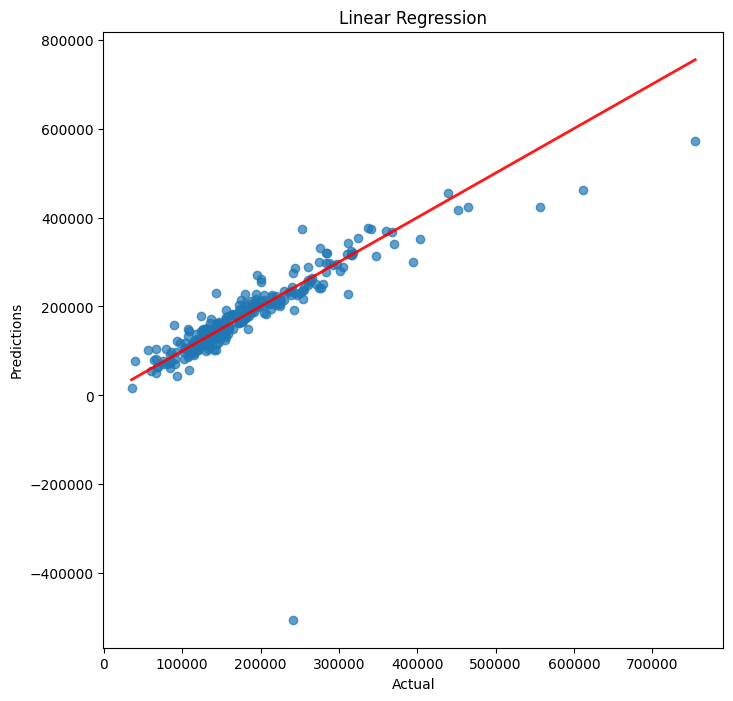

In [145]:
xp = np.linspace(min(y_test), max(y_test), 100)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, label="Linear Regression", alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red')
plt.title("Linear Regression")
plt.show()

### Cross-Validation

In [146]:
X_train = np.array(X_train)
y_train = np.array(y_train)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

all_actual = []
all_predictions = []
rmse_scores = [] 

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    model.fit(X_train_fold, y_train_fold)
    predictions_fold = model.predict(X_test_fold)
   
    rmse_fold = np.sqrt(mean_squared_error(y_test_fold, predictions_fold))
    rmse_scores.append(rmse_fold)

    all_actual.extend(y_test_fold)
    all_predictions.extend(predictions_fold)

### Performance Metrics (Cross-Validation)

In [147]:
print("\nCross-Validation RMSE Scores:")
for i, score in enumerate(rmse_scores, start=1):
    print(f"  Fold {i}: {score:.4f}")

print(f"  Mean RMSE: {np.mean(rmse_scores):.4f}")
print(f"  Standard Deviation of RMSE: {np.std(rmse_scores):.4f}")



Cross-Validation RMSE Scores:
  Fold 1: 29205.8803
  Fold 2: 40148.2790
  Fold 3: 47459.0896
  Fold 4: 26423.2075
  Fold 5: 39323.0969
  Mean RMSE: 36511.9107
  Standard Deviation of RMSE: 7695.7999


### Actual vs Predicted (Cross-Validation)

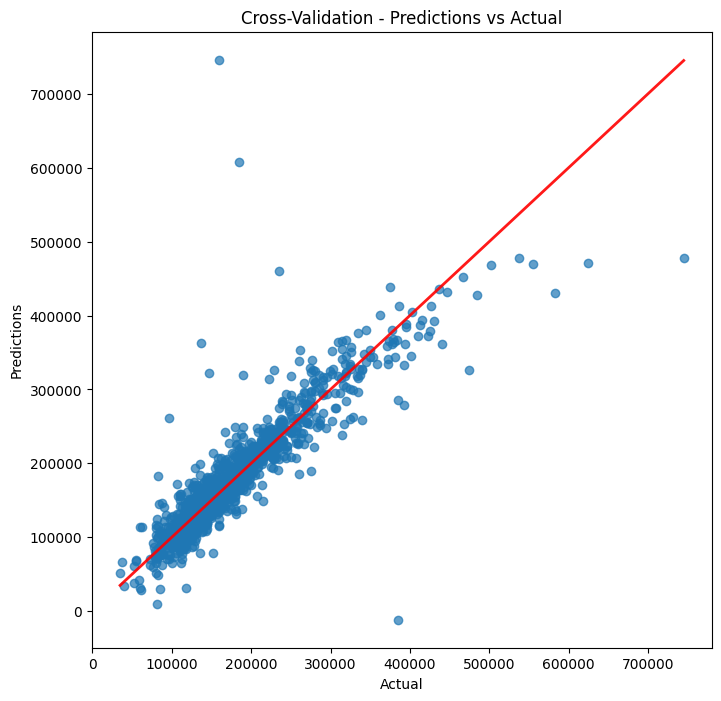

In [148]:
plt.figure(figsize=(8, 8))
plt.scatter(all_actual, all_predictions, label="Cross-Validation Predictions", alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.plot([min(all_actual), max(all_actual)], [min(all_actual), max(all_actual)], color='red', linewidth=2, alpha=0.9) 
plt.title("Cross-Validation - Predictions vs Actual")
plt.show()